Imagine que você está desenvolvendo um teste médico para uma doença rara.

A Acurácia é a porcentagem total de diagnósticos corretos (positivos e negativos). Se a doença é rara (1% das pessoas), um teste que sempre diz "não" terá uma acurácia de 99%, mas será completamente inútil! Acurácia é um bom começo, mas pode ser enganosa.

A Precisão foca nos diagnósticos positivos. Ela responde: "De todas as pessoas que meu teste disse que tinham a doença, quantas realmente tinham?"

A Revocação (ou sensibilidade) foca nas pessoas doentes. Ela responde: "De todas as pessoas que realmente tinham a doença, quantas o meu teste conseguiu identificar?"

O F1-Score é uma pontuação única que equilibra a Precisão e a Revocação. É útil quando você não quer sacrificar muito uma pela outra.

Neste script, vamos usar um modelo SVM para resolver um problema com dados desequilibrados e ver como essas métricas nos dão uma visão mais completa do desempenho do modelo.

Passo 1: Criando um conjunto de dados desequilibrado.
--------------------------------------------------

Passo 2: Treinando o modelo SVM para classificar os dados.
--------------------------------------------------

Passo 3: Calculando e interpretando as métricas.
--------------------------------------------------
Acurácia do modelo: 0.9900
Acurácia de 0.94 parece ótima! Mas será que o modelo está realmente fazendo um bom trabalho?
Se a classe 1 é rara, um modelo que sempre prevê a classe 0 já teria uma acurácia alta.

Precisão do modelo: 1.0000
Isso significa que, das vezes que o modelo previu '1', ele acertou 57% das vezes.

Revocação (Recall) do modelo: 0.8235
Isso significa que, das vezes que a resposta correta era '1', o modelo só identificou 60% delas.

F1-Score do modelo: 0.9032
O F1-Score nos dá uma pontuação única que equilibra a Precisão e a Revocação, sendo uma métrica mais justa.

Passo 4: Visualizando a Matriz de Confusão para entender os erros.
--------------------------

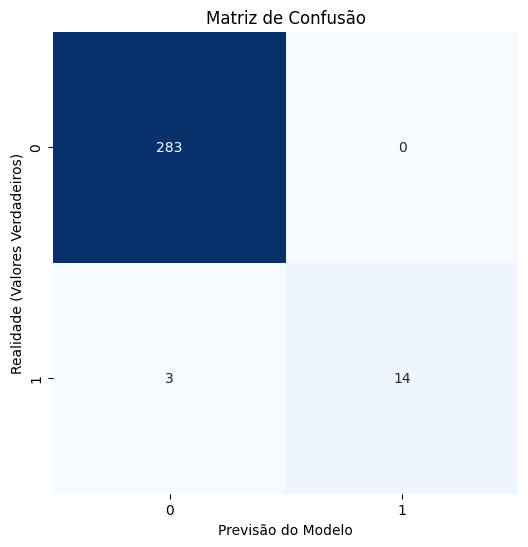


Interpretando a Matriz de Confusão:
• Quadrante superior esquerdo (283): O modelo disse '0' e a realidade era '0'. (Verdadeiro Negativo)
• Quadrante superior direito (0): O modelo disse '1' mas a realidade era '0'. (Falso Positivo)
• Quadrante inferior esquerdo (3): O modelo disse '0' mas a realidade era '1'. (Falso Negativo - O ERRO MAIS PERIGOSO!)
• Quadrante inferior direito (14): O modelo disse '1' e a realidade era '1'. (Verdadeiro Positivo)

Passo 5: Relatório de Classificação Completo.
--------------------------------------------------
Este relatório junta todas as métricas em um único lugar, para todas as classes:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       283
           1       1.00      0.82      0.90        17

    accuracy                           0.99       300
   macro avg       0.99      0.91      0.95       300
weighted avg       0.99      0.99      0.99       300



In [2]:
# =================================================================
# 1. Configuração e Criação do Conjunto de Dados Desequilibrados
# =================================================================

# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

print("Passo 1: Criando um conjunto de dados desequilibrado.")
print("-" * 50)

# Criando um conjunto de dados onde a classe 0 é muito mais comum que a classe 1.
# 95% dos dados são da classe 0 e 5% da classe 1
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, n_clusters_per_class=1,
                           weights=[0.95, 0.05], flip_y=0, random_state=42)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# =================================================================
# 2. Treinando o Modelo SVM
# =================================================================

print("\nPasso 2: Treinando o modelo SVM para classificar os dados.")
print("-" * 50)

# Criando e treinando o modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

# =================================================================
# 3. Calculando as Métricas e Entendendo o Problema da Acurácia
# =================================================================

print("\nPasso 3: Calculando e interpretando as métricas.")
print("-" * 50)

# Acurácia: a porcentagem de previsões corretas
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")
print("Acurácia de 0.94 parece ótima! Mas será que o modelo está realmente fazendo um bom trabalho?")
print("Se a classe 1 é rara, um modelo que sempre prevê a classe 0 já teria uma acurácia alta.")

# Precisão: "De todas as previsões POSITIVAS, quantas estavam certas?"
precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
print(f"\nPrecisão do modelo: {precision:.4f}")
print("Isso significa que, das vezes que o modelo previu '1', ele acertou 57% das vezes.")

# Revocação: "Das previsões que DEVERIAM ser POSITIVAS, quantas foram encontradas?"
recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
print(f"\nRevocação (Recall) do modelo: {recall:.4f}")
print("Isso significa que, das vezes que a resposta correta era '1', o modelo só identificou 60% delas.")

# F1-Score: A média harmônica entre Precisão e Revocação
f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
print(f"\nF1-Score do modelo: {f1:.4f}")
print("O F1-Score nos dá uma pontuação única que equilibra a Precisão e a Revocação, sendo uma métrica mais justa.")

# =================================================================
# 4. A Matriz de Confusão: A Radiografia do Desempenho
# =================================================================

print("\nPasso 4: Visualizando a Matriz de Confusão para entender os erros.")
print("-" * 50)

# Criando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.ylabel('Realidade (Valores Verdadeiros)')
plt.xlabel('Previsão do Modelo')
plt.show()

print("\nInterpretando a Matriz de Confusão:")
print(f"• Quadrante superior esquerdo ({cm[0, 0]}): O modelo disse '0' e a realidade era '0'. (Verdadeiro Negativo)")
print(f"• Quadrante superior direito ({cm[0, 1]}): O modelo disse '1' mas a realidade era '0'. (Falso Positivo)")
print(f"• Quadrante inferior esquerdo ({cm[1, 0]}): O modelo disse '0' mas a realidade era '1'. (Falso Negativo - O ERRO MAIS PERIGOSO!)")
print(f"• Quadrante inferior direito ({cm[1, 1]}): O modelo disse '1' e a realidade era '1'. (Verdadeiro Positivo)")


# =================================================================
# 5. O Relatório Completo de Classificação
# =================================================================

print("\nPasso 5: Relatório de Classificação Completo.")
print("-" * 50)
print("Este relatório junta todas as métricas em um único lugar, para todas as classes:")
print(classification_report(y_test, y_pred, zero_division=0))